## Review v. 2<a class="tocSkip">

All your hard work has paid off, and now your project is perfect! I'm glad to say that your project has been accepted. Well done!

#  Telling a story using data

# Course project

### Step 0. Intro and table of content

#### Table of contents

0. [Step 1. Download the data and prepare it for analysis](#introduction)
    - [Step 1: Conclusion](#introduction1)   
1. [Step 2. Data analysis](#part2)
    - [Part 1: Conclusion](#part21)  
2. [Step 3. Presentation](#part3)

### Intro 
<a class="anchor" id="introduction"></a>

**_You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?_**

**_You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA._**

**The goal of this project is to perform out of the house food and drinking market research in LA to gain additional information which can help us to find out what kind of establishment are popular in the city, how big they are and where they are located.** 
    
**This information will also be used in the presentation for the project investors.** 

## Step 0. Download the data and prepare it for analysis

<a class="anchor" id="part1"></a>

In [1]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import usaddress

import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    data = pd.read_csv('rest_data_us.csv', nrows=500)
except:
    data = pd.read_csv('/datasets/rest_data_us.csv', nrows=500)

In [4]:
data.sample(10)

,id,object_name,address,chain,object_type,number
191,11977,ALVAREZ BAKERY,4125 CITY TERRACE DR,True,Bakery,3
384,12170,VENICE JAPANESE COMMUNITY CT,12448 BRADDOCK DR,False,Restaurant,21
248,12034,PIZZA NEXT DOOR,806 W 8TH ST # B,False,Pizza,3
125,11911,THE HARVEST BAR 2,8601 LINCOLN BLVD STE 190,False,Bar,26
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
56,11842,LOTERIA GRILL SPACE 7C,700 WORLD WAY,False,Restaurant,17
491,12277,FIRST STREET CUISINE,2200 E 15TH ST,False,Restaurant,44
249,12035,FRATERNAL ORDER OF EAGLES,13018 W WASHINGTON BLVD,False,Restaurant,96
412,12198,PROSPECT & GOURMANDE,272 S LA CIENGA BLVD,False,Restaurant,42
257,12043,B TWENTY FOUR,2223 N BROADWAY,False,Restaurant,15


In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   object_name  500 non-null    object
 2   address      500 non-null    object
 3   chain        500 non-null    bool  
 4   object_type  500 non-null    object
 5   number       500 non-null    int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 113.8 KB


So we can optimize import a tiny bit. 

In [6]:
try:
    df = pd.read_csv('rest_data_us.csv',
                      dtype={'object_type': 'category'})
except:
     df = pd.read_csv('/datasets/rest_data_us.csv',
                      dtype={'object_type': 'category'})

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 1.8 MB


In [8]:
df.object_type.unique()

['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza']
Categories (6, object): ['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza']

It seems to be okay. 

In [9]:
df.id.describe()

count     9651.000000
mean     16611.000000
std       2786.148058
min      11786.000000
25%      14198.500000
50%      16611.000000
75%      19023.500000
max      21436.000000
Name: id, dtype: float64

In [10]:
df.number.describe()

count    9651.000000
mean       43.695161
std        47.622874
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

The max/min values in a few columns are really small, so we can save a part of used memory by using shorter version of interger. 

In [11]:
df.id = df.id.astype('int16')

In [12]:
df.number = df.number.astype('int16')

In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int16   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int16   
dtypes: category(1), int16(2), object(3)
memory usage: 1.7 MB


We have three missing values in the _chain_ column. Let's take a closer look.

In [14]:
df[df['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


According to Google, all the three establishments are not a part of any chain. Let's correct our dataset. 

In [15]:
df.loc[df['chain'].isnull(), 'chain'] = False

In [16]:
df[df['chain'].isnull()]

,id,object_name,address,chain,object_type,number


In [17]:
df[df['id'] == 19194]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,False,Restaurant,14


It seems to be corrected properly. 

In [18]:
df.duplicated().sum()

0

No duplicates is always good.

In [19]:
df.sample(10)

,id,object_name,address,chain,object_type,number
5198,16984,KIM BAP PARADISE,401 S VERMONT AVE #3,False,Restaurant,9
3327,15113,LA SERENATA DE GERIBALDI,10924 W PICO BLVD,True,Restaurant,103
4011,15797,SILVERLAKE RAMEN,2927 W SUNSET BLVD,False,Restaurant,42
5037,16823,TRINNIE'S BUBBLE TEA,5173 W SUNSET BLVD,False,Restaurant,17
4947,16733,QUICK E MART,244 E 37TH ST,False,Restaurant,18
3297,15083,TAQUERIA LOS ANAYA,4651 W ADAMS BLVD,False,Restaurant,5
5694,17480,CANELE,3219 GLENDALE BLVD,False,Restaurant,144
2476,14262,EL TACO MEXICANO,1300 E VERNON AVE,False,Fast Food,4
5591,17377,MORINOYA,11301 W OLYMPIC BLVD STE 210,False,Restaurant,49
177,11963,PACIFIC DINING CAR,1310 W 6TH ST,False,Restaurant,149


The data seems not to be 100% reliable. At least:

- the establishment with ID 12168 (we got this row in the last output) is obvious a bakehouse, but its category in our dataset is mistakenly "restaurant"

- the establishment with ID 12248 (we got this row in the last output) is obvious a pub and thus rather a bar, but its category in our dataset is mistakenly "restaurant"

- the establishment with ID 12272 (we got this row in the last output) is obvious a cafe, but its category in our dataset is mistakenly "restaurant"

We would not use such a unreliable data for real business analysis. But in this educational project we just leave it as is. 

In [20]:
df.groupby('object_type')['id'].nunique()

object_type
Bakery         283
Bar            292
Cafe           435
Fast Food     1066
Pizza          320
Restaurant    7255
Name: id, dtype: int64

The output also shows a disproportion: we have a lot of restaurants and too small amount of all other establishments categoriries. 

### Step 1. Conclusion
<a class="anchor" id="introduction1"></a>

During this step we prepared the data for analysis: we imported the datasets optimizing the datatypes as far as it was possible during the import and after it. We also checked the datasets for duplicates and missing values. Finally we manually filled out some missing data we had. 

Thanks sample output we found out, that some of our the data can not be absolutly trustworthy(but we use some open source data, it would be a surprise, if we had 100% reliable data in a such case). 

## Step 2. Data analysis
<a class="anchor" id="part2"></a>

**_Investigate the proportions of the various types of establishments. Plot a graph._**

In [21]:
df.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number'], dtype='object')

In [22]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [23]:
types = (
    df.drop(['object_name', 'address', 'chain', 'number'], axis=1)
    .groupby('object_type', as_index=False).nunique())

types.columns = ['object_type', 'nr. of objects']
types

,object_type,nr. of objects
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,320
5,Restaurant,7255


Data like this can be pretty good visualised as a bar plot graph or as a pie diagram: 

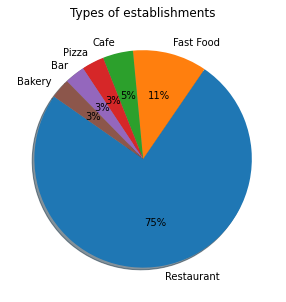

In [27]:
# plot pie chart with proportions
plt.figure(figsize=(10, 5))
plt.pie(types2['nr. of objects'], labels=types2['object_type'],autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Types of establishments')
plt.show()

In our humble opinion, there are too much restaurants in LA. (Or our data are not reliable.)

**_Investigate the proportions of chain and nonchain establishments. Plot a graph._**

We are creating a small DF with chain establishments here: 

In [28]:
chains = df['chain'].value_counts().rename_axis('chain').reset_index(name='count')

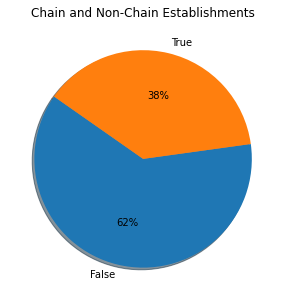

In [29]:
plt.figure(figsize=(10, 5))
plt.pie(chains['count'], labels=chains['chain'],autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Chain and Non-Chain Establishments');

As we can see, almost two thirds of establishments are nonchane, while 38% of locations belong to a chain. 

_Which type of establishment is typically a chain?_

In [30]:
chain_data = df[df['chain'] == True]
len(chain_data)

3676

In [31]:
chain_data.head(10)

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
29,11815,KRISPY KRUNCHY CHICKEN - ALVARADO,600 S ALVARADO ST STE 111C,True,Restaurant,15
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118


Let's see, what kind of chain establishments we have...

In [32]:
chain_data = pd.pivot_table(chain_data,index=['chain','object_type'], values=['id'], aggfunc='count').reset_index()
chain_data.columns = ['chain', 'object_type', 'count']
chain_data = chain_data.sort_values(by='count', ascending=False)
chain_data.head(10)

,chain,object_type,count
5,True,Restaurant,2292
3,True,Fast Food,605
0,True,Bakery,283
2,True,Cafe,266
4,True,Pizza,153
1,True,Bar,77


...and compare it with all businesses data we have: 

In [33]:
total_data = df['object_type'].value_counts().rename_axis('object_type').reset_index(name='total')

In [34]:
total_data

,object_type,total
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


In [35]:
chain_data = pd.merge(chain_data, total_data, how='inner', on='object_type')
chain_data['ratio'] = chain_data['count'] / chain_data['total'] * 100
chain_data.head()

,chain,object_type,count,total,ratio
0,True,Restaurant,2292,7255,31.592006
1,True,Fast Food,605,1066,56.754221
2,True,Bakery,283,283,100.000000
3,True,Cafe,266,435,61.149425
4,True,Pizza,153,320,47.812500


Let's see the data on a bar graph. 

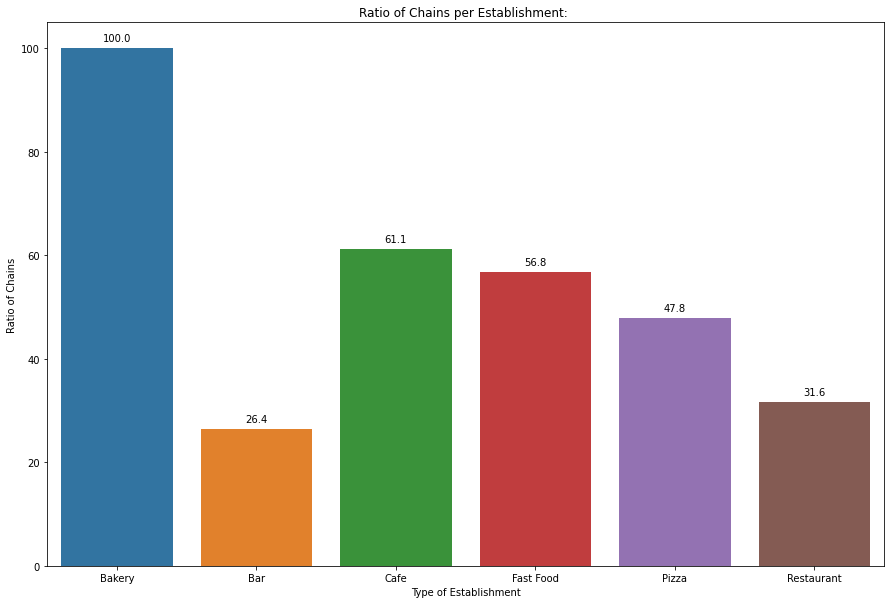

In [36]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(data = chain_data.sort_values('ratio', ascending=True), 
                 x='object_type', 
                 y='ratio')

plt.xlabel('Type of Establishment')
plt.ylabel('Ratio of Chains')
plt.title('Ratio of Chains per Establishment: ')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


plt.show()

As we can see in the output/on the graph, all of bakeries in our datasets belongs to a one of the chains. (And this fact raiseы a question again, if our data are trustworthy.) 

Pizzerias, fast food locations and cafes are very often a members of a some chain. Most of the bars and restaurants, on the other hand, are non-chain businesses. 

**_What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?_**

Let's get a bit more chain's data for our further analysis... 

In [37]:
chains2 = df[df['chain'] == True]
chains2 = pd.pivot_table(chains2, index=['number'], values=['id'], aggfunc=['count']).reset_index()
chains2.columns = ['seat_number','count']
chains2 = chains2.sort_values(by='count', ascending=False)
chains2.head(10)

,seat_number,count
11,12,99
17,18,89
2,3,84
20,21,83
12,13,81
24,25,81
28,29,79
23,24,78
0,1,77
21,22,76


...and compare it with all businesses data we have: 

In [38]:
non_chain = df[df['chain'] == False]
non_chain = pd.pivot_table(non_chain, index=['number'], values=['id'], aggfunc=['count']).reset_index()
non_chain.columns = ['seat_number','count']
non_chain = non_chain.sort_values(by='count', ascending=False)

And now we can study a correlation: 

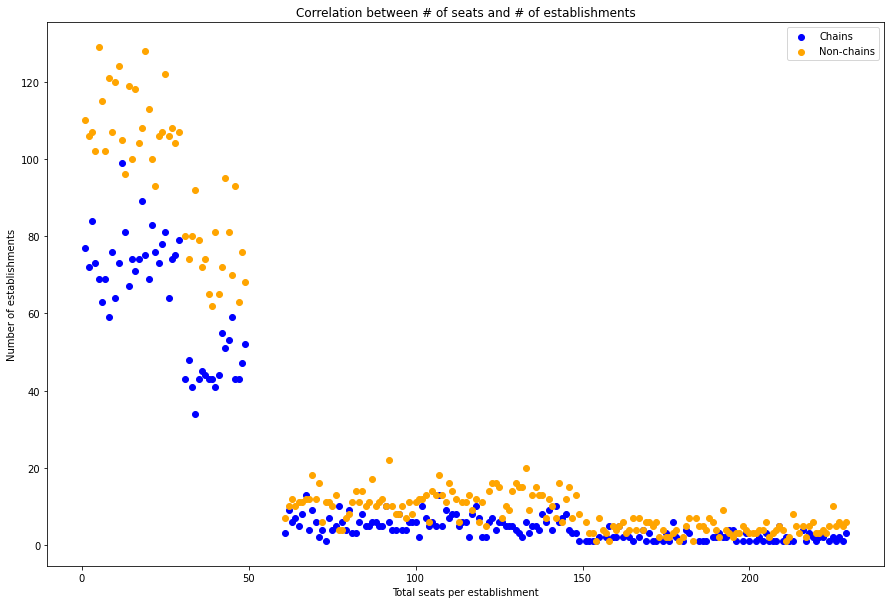

In [39]:
plt.figure(figsize=(15, 10))
plt.scatter(chains2['seat_number'], chains2['count'], color='blue', label='Chains')
plt.scatter(non_chain['seat_number'], non_chain['count'], color='orange', label='Non-chains')
plt.xlabel('Total seats per establishment')
plt.ylabel('Number of establishments')
plt.legend()
plt.title('Correlation between # of seats and # of establishments');

The graph has two noticeable zones: based on the plot, we can say, that most of the establishments have 50 or less seats, while very few of the businesses have 50+ seats. 

However, the nonchain establishments typically have more seats than the chain establishments (usually slitly more in the segment 50+ seats and much more in the segment less than 50 seats per location). 

The interesting detail is also a gap in the middle: it seems, that in our dataset there is no sites with 50-60 seats per establishment. 

Chains appears to be characterized by many establishments with a small number of seats. 

**_Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs._**

In [40]:
labels = df.object_type.unique()    
values = []

We are going to extract data, calculate avg and append to list _values_ for each establishment.

In [41]:
for rest in range(len(labels)):
    type = labels[rest]
    current = df[df['object_type'] == type]
    avg_seats = current['number'].mean()
    values.append(avg_seats)

Now we can create a new DF we are going to use further and plot a graph we need. 

In [42]:
df2 = pd.DataFrame({"Establishment":labels, "Seats":values})

In [43]:
df2.columns = df2.columns.str.lower()

In [44]:
df2.head()

,establishment,seats
0,Cafe,25.000000
1,Restaurant,48.042316
2,Fast Food,31.837711
3,Bakery,21.773852
4,Bar,44.767123


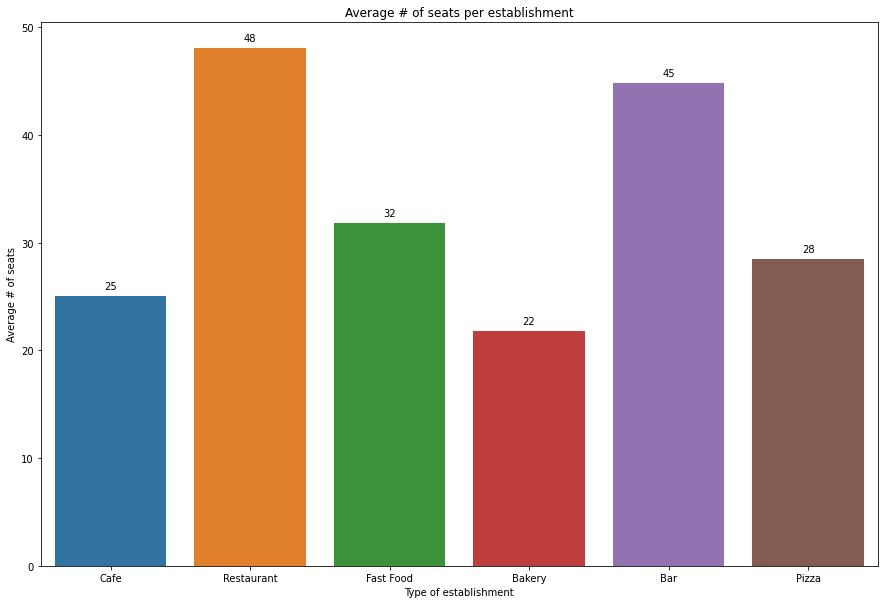

In [45]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(data = df2.sort_values('seats', ascending=True), 
                 x='establishment', 
                 y='seats')

plt.xlabel('Type of establishment')
plt.ylabel('Average # of seats')
plt.title('Average # of seats per establishment')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


plt.show()

The bar graph above demonstrates the average number of seats for each type of establishment: maximal value(48 seats) have restaurants and minimal(22) - bakeries. 

<div class="alert alert-info" role="alert">
    
Thanks this graph we can claim, that the biggest establishments in LA (with 48/45 seats in average) are restaurants and bars. As we already know, this two categories also has the smallest percent of chain locations. We also already know, that typically a non-chain businesses have more seats, than a chain ones. 
    
Bakeries, cafes, pizzerias and fast food on the other hand, are mostly (in case of pizzerias - very often with 48%) part of some chain; accordingly, most of the chain establishments has relatively small amount of seats, what is also confirmed by this graph with additional information about the concrete figures of average seats number can be found on the corresponding bars.  

</div>

**_Put the data on street names from the address column in a separate column._**

We have to preprocess address data at first, because the data in this column seems to be filled in manually and contain (partually) different names for the same streets. We are going to use _usaddress_ library, as our tutor recommended. 

In [46]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [47]:
def clean_street(raw):
    
    #two cases need to be fixed manually
    
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='LOS ANGELES ST'
        
    # standart cases 
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:   
            if i[1] == 'StreetName':
                if 'StreetName' in dict_address.keys():
                    dict_address['StreetName'] = dict_address['StreetName'] +' ' +i[0]
                else:
                    dict_address.update({i[1]:i[0]})
            else:
                dict_address.update({i[1]:i[0]})  
                      
        clean_adress=str(dict_address['StreetName'])
    return clean_adress

In [48]:
df['street'] = df.address.apply(clean_street)

In [49]:
df.head()

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK


In [50]:
df.sample(10)

,id,object_name,address,chain,object_type,number,street
8916,20702,PAPA JOHN'S PIZZA #2623,2222 S HOOVER ST,True,Pizza,6,HOOVER
5996,17782,TORN BASIL,100 WORLD WAY,False,Restaurant,5,WORLD
2022,13808,RAMA THAI CUISINE,625 S HILL ST B68,False,Restaurant,37,HILL
1446,13232,MENDOCINO FARMS,444 S FLOWER ST STE 160,True,Restaurant,10,FLOWER
86,11872,JACK IN THE BOX # 335,2521 PASADENA AVE,True,Restaurant,121,PASADENA
8987,20773,SEVENTH VEIL,7180 W SUNSET BLVD,False,Restaurant,104,SUNSET
8006,19792,YUM YUM DONUT #13C FRANCHISE,12201 VENICE BLVD,False,Fast Food,24,VENICE
3739,15525,SLAUSON DONUTS,3451 W SLAUSON AVE,False,Fast Food,10,SLAUSON
9106,20892,SOOOPS WESTSIDE,10640 WOODBINE ST STE 102,False,Restaurant,8,WOODBINE
2511,14297,POMEGRANATE,8556 W 3RD ST,False,Restaurant,22,3RD


Thus we have street names only in the column _street_ now. 

**_Plot a graph of the top ten streets by number of restaurants._**

At first we are going to sort street data by number of occurrences. 

In [51]:
street_data = pd.pivot_table(df, index=['street'], values=['id'], aggfunc=['count']).reset_index()
street_data.columns = ['street','count']
top10_street = street_data.sort_values(by='count', ascending=False).head(10)

In [52]:
top10_street

,street,count
425,SUNSET,404
475,WILSHIRE,398
365,PICO,370
465,WESTERN,369
181,FIGUEROA,334
347,OLYMPIC,309
449,VERMONT,288
395,SANTA MONICA,264
25,3RD,263
227,HOLLYWOOD,253


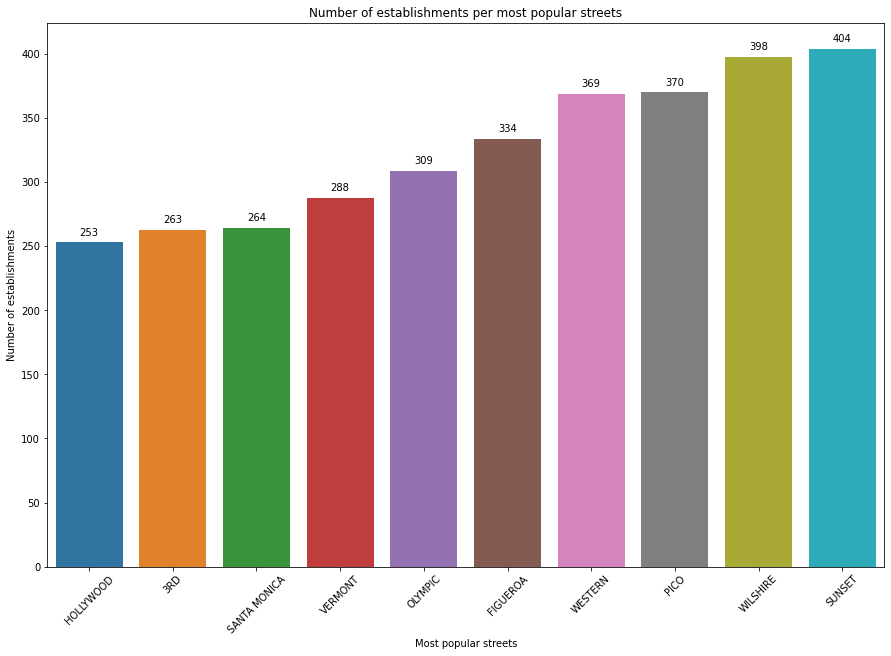

In [53]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(data = top10_street.sort_values('count', ascending=True), 
                 x='street', 
                 y='count')

# Add titles and captions
plt.xlabel('Most popular streets')
plt.ylabel('Number of establishments')
plt.title('Number of establishments per most popular streets')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.show()

So we can extract form the graph, the streets with most nomber of restaurants are Sunset Boulevard, Wilshire Boulevard, Pico Boulevard and Western Avenue (350+ locations on each street).

**_Find the number of streets that only have one restaurant._**

It's pretty easy to find: 

In [54]:
single_street = street_data[street_data['count'] == 1]
len(single_street)


204

In [55]:
single_street.head()

,street,count
0,1/4 FAIR PARK,1
1,103,1
3,10TH,1
5,11th,1
9,16TH,1


Thus we have 200+ streets in LA that only have one restaurant. 

**_For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?_**

"Streets with a lot of restaurants" is a vague formulation. We are going to find an average number of establishments per street and consider only those greater than average. 

In [56]:
avg = street_data['count'].mean()
int(avg)

19

In [57]:
avg_data = street_data[street_data['count'] > avg]

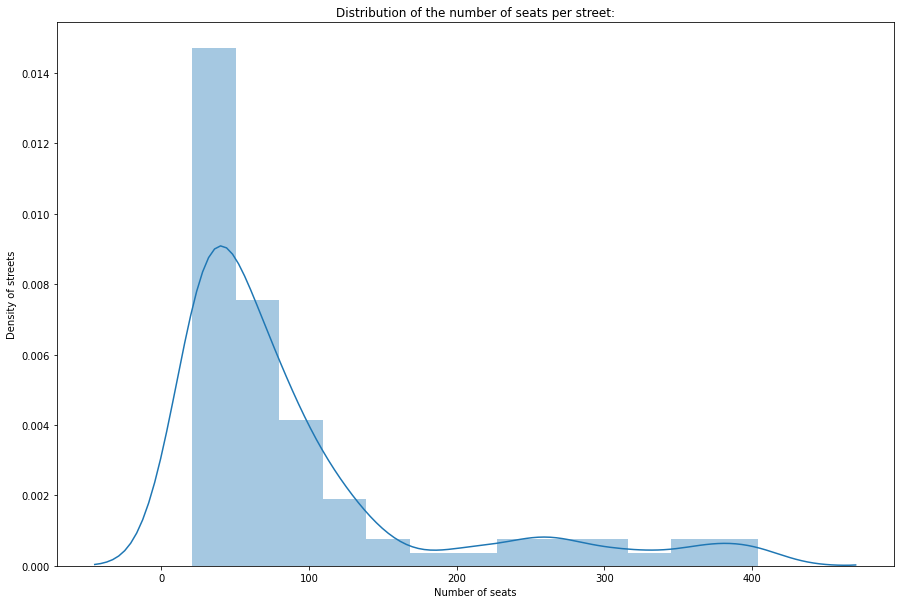

In [58]:
plt.figure(figsize=(15, 10))

ax = sns.distplot(avg_data['count'])
ax.set_title('Distribution of the number of seats per street:')
ax.set_xlabel('Number of seats')
ax.set_ylabel('Density of streets');

Extrapolating from the graph we can claim, that on the most popular streets we can mostly find small (up to 50 seats) and medium-size (50-100 seats) businesses. Appropriately the biggest establishments(200+ seats) are often the only one resaurant on the street (and sometimes there is/are one or two more). 

### Step 2. Conclusion
<a class="anchor" id="part21"></a>

Since we are going to open a  a small robot-run café in Los Angeles, we did an analysis of the current market situation. 

According to data we have, the most popular establishments in the LA  are restaurants (75% share of all food estalishments). 

A lot of types of establishments are mostly part of a chain: 100% of bakeries, over 50% of cafes and fast food locations are part of a chain. In the same time less than 50% of restaurants and bars are part of a chain. 

Chains are characterized by having many establishments with a small number of seats (less than 100, otften also less than 50 seats). 


The average number of seats in a restaurant are 48 seats, in a bar are 45 seats and less than those 30 seats for other food establishments. 

The four streets in LA have the most food establishments on them (350+ food establishments per street) are: Sunset Boulevard, Wilshire Boulevard, Pico Boulevard, Western Avenue. The following streets also have a lot of (25-350 establishments per street): Figueroa Street, Olympic Boulevard, Vermount Avenue, Monica Boulevard, 3rd Street and Hollywood Boulevard. The establishments that are on these most popular streets have in average 20-100 seats. 


It's hard to formulate a concrete recommendations with data we have: we do not have any financial information including but not limited to how profitable are existing establishments. The fact, that most of existing places have 30-50 seats, does not mean, that our café should also have 30-50 seats. 


May be it is worth to consider an option open a restaurant, and not a café: there are less big players (chains) in the restaurant market relative to cafés; small café are being outcompeted by café chains. 

As a suitable location any of mentioned above popular streets can be choosen. 

It's even harder to leave any meaningful commentary on the possibility of developing a chain, if we are still trying to analyse data we have. It's a commonplace, that 2 sucsessful locations are better than only one, and 2 of them are better than 2 and so on. Maybe it be easier to build a chain in restaurant market, where (according to our data) there are less big players. 


## Step 3. Presentation (external link)
<a class="anchor" id="part3"></a>

Presentation: https://docs.google.com/presentation/d/1fQl27NFbGfq8D97PWXfZxS6uT4nwxviyxND03guIrVo/edit?usp=sharing 